# EEGLab tutorial #2: Using an existing EEGLAB montage

Authors          : Katie Douglas

Date            : 2022-01-13

Currently, the HyPyP EEGlab tutorial shows you how to load in a dataset by creating a montage.

However, it is also possible to load datasets to use with HyPyP using the locations provided in a channel locations file used in EEGlab.
(See https://eeglab.org/tutorials/04_Import/Channel_Locations.html#supported-data-formats for more information)

In this tutorial we use the '.locs' file containing the information about channel locations that accompanies the sample dataset included when you download EEGlab. Other location file formats, like '.elp' or '.eloc' should also be able to be used using this method. 

The channel location visualtizations in this tutorial use MNE visualizations. Please note that MNE and EEGLAB channel topomap and channel location visualizations are known to be slightly different (MNE provides a detailed discussion about this here https://mne.tools/stable/auto_examples/visualization/eeglab_head_sphere.html). 

In [1]:
import mne
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

# 1. Load in the epoched data

For each participant, both .set file and .fdt files should be stored in the same directory.

The data used is the sample dataset included in EEGLab (for more info, see the bullet point about EEGLAB distribution https://eeglab.org/tutorials/tutorial_data.html).

In this notebook, we use data that is preprocessed in EEGlab. The data should be epoched.

(Note: Participants do not need to have the same number of epochs, but must have the same sampling rate (aka number of samples per epoch.)


In [2]:
path_1 = "../EEGlab tutorial/sample_data/eeglab_data_epochs_ica.set"
path_2 = "../EEGlab tutorial/sample_data/eeglab_data_epochs_ica.set"


epo1 = mne.io.read_epochs_eeglab(path_1)

epo2 = mne.io.read_epochs_eeglab(path_2)



Extracting parameters from ../EEGlab tutorial/sample_data/eeglab_data_epochs_ica.set...
Not setting metadata
Not setting metadata
80 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from ../EEGlab tutorial/sample_data/eeglab_data_epochs_ica.set...
Not setting metadata
Not setting metadata
80 matching events found
No baseline correction applied
0 projection items activated
Ready.


# 2. Read in the raw data

In [3]:
raw_data_path= "../EEGlab tutorial/sample_data/eeglab_data.set"

raw_data= mne.io.read_raw_eeglab(raw_data_path)

Reading ../EEGlab tutorial/sample_data\eeglab_data.fdt


# 3. Equalize the number of epochs

In [4]:
mne.epochs.equalize_epoch_counts([epo1, epo2])

Dropped 0 epochs: 
Dropped 0 epochs: 


# 4. Load in the EEGLAB montage

In [5]:
eeglab_montage="../EEGlab tutorial/sample_data/eeglab_chan32.locs"

# 5. Create a Custom EEGLAB montage

In [6]:
montage=mne.channels.read_custom_montage(eeglab_montage)

# 6. Set the Custom EEGLAB montage (using the raw data)

In [7]:
raw_data.set_montage(montage)

<RawEEGLAB | eeglab_data.fdt, 32 x 30504 (238.3 s), ~86 kB, data not loaded>

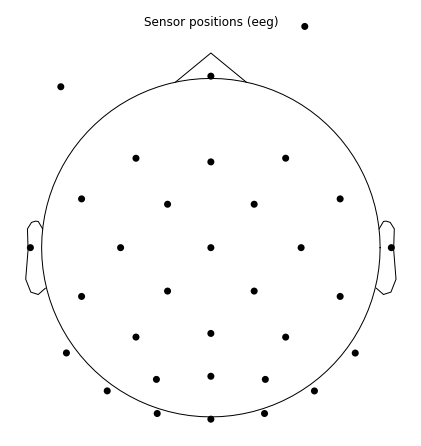

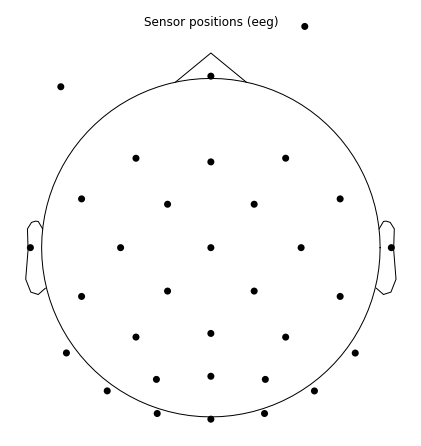

In [8]:
raw_data.plot_sensors()

Note that two channels are not located on the head in this plot. When we print out the channel names below, you can see that this is because these are the two EOG channels.

In [9]:
print(raw_data.info['ch_names'])

['FPz', 'EOG1', 'F3', 'Fz', 'F4', 'EOG2', 'FC5', 'FC1', 'FC2', 'FC6', 'T7', 'C3', 'C4', 'Cz', 'T8', 'CP5', 'CP1', 'CP2', 'CP6', 'P7', 'P3', 'Pz', 'P4', 'P8', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'O1', 'Oz', 'O2']


In [10]:
raw_data.info

<Info | 8 non-empty values
 bads: []
 ch_names: FPz, EOG1, F3, Fz, F4, EOG2, FC5, FC1, FC2, FC6, T7, C3, C4, Cz, ...
 chs: 32 EEG
 custom_ref_applied: False
 dig: 32 items (32 EEG)
 highpass: 0.0 Hz
 lowpass: 64.0 Hz
 meas_date: unspecified
 nchan: 32
 projs: []
 sfreq: 128.0 Hz
>

As MNE recognizes these EEGLAB EOG channels as EEG channels, the EOG channels will need to dropped manually.

# 7. Now apply the custom montage to the epoched data

In [11]:
epo1.set_montage(montage)

<EpochsEEGLAB |  80 events (all good), -1 - 1.99219 sec, baseline off, ~7.6 MB, data loaded,
 'square': 5
 'square/rt': 73
 'square/square/rt': 2>

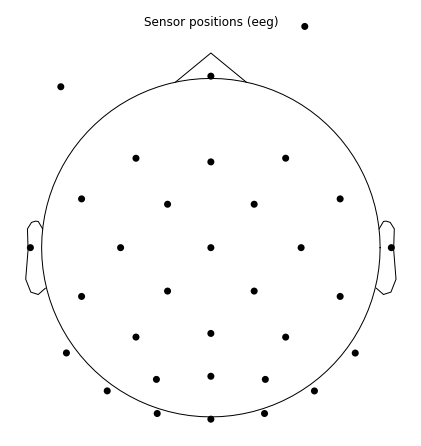

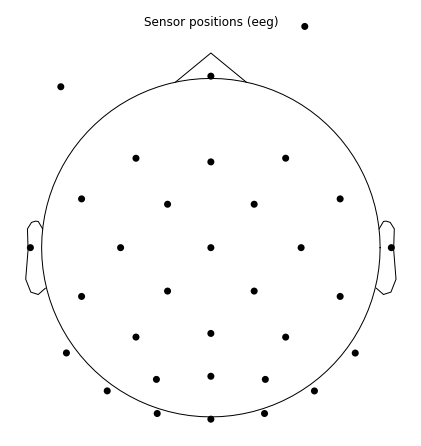

In [12]:
epo1.plot_sensors()

# 8. Drop the EOG channels

In [13]:
epo1.drop_channels(['EOG1','EOG2'])

<EpochsEEGLAB |  80 events (all good), -1 - 1.99219 sec, baseline off, ~7.1 MB, data loaded,
 'square': 5
 'square/rt': 73
 'square/square/rt': 2>

And now, the EOG channels are gone!

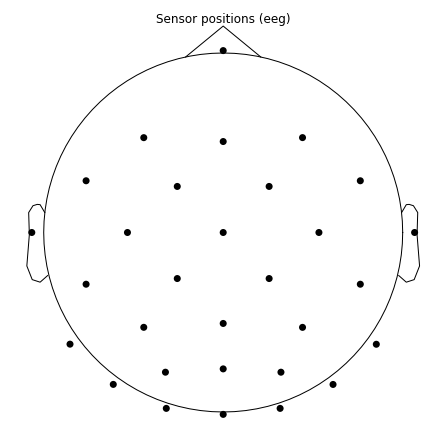

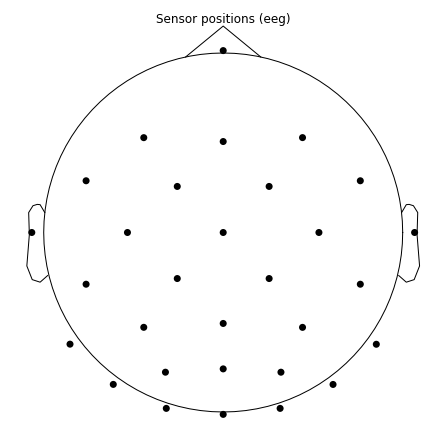

In [14]:
epo1.plot_sensors()

We can also do this in one step, as demonstrated below with epo2.

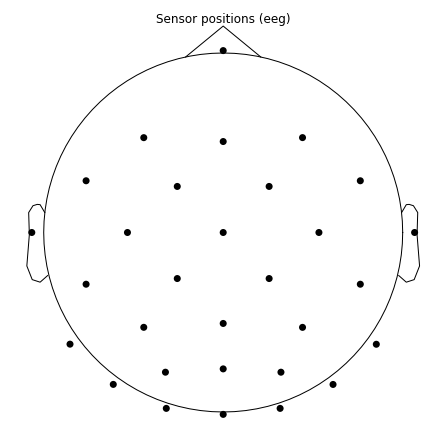

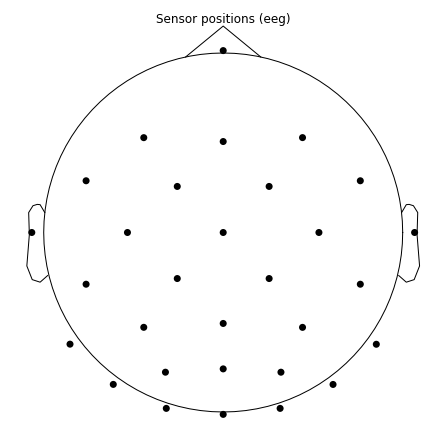

In [15]:
epo2.set_montage(montage)
epo2.drop_channels(['EOG1','EOG2'])
epo2.plot_sensors()